<a href="https://colab.research.google.com/github/ivolake/2021sem9_ml_labs/blob/main/L4_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный бустинг

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_boston()
l = data['data'].shape[0]
X_train, X_test = data['data'][:int(0.75 * l)], data['data'][int(0.75 * l):]
y_train, y_test = data['target'][:int(0.75 * l)], data['target'][int(0.75 * l):]

In [ ]:
!pip install catboost

  Using cached https://files.pythonhosted.org/packages/af/42/cb9355df32c69b553e72a2e28daee25d1611d2c0d9c272aa1d34204205b2/enum34-1.1.6-py3-none-any.whl


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
%%time

from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth, task_type="GPU").fit(X_train, y_train).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)

0:	learn: 25.8332622	total: 18.4ms	remaining: 0us
0:	learn: 25.8342780	total: 24.1ms	remaining: 0us
0:	learn: 25.8364682	total: 28.6ms	remaining: 0us
0:	learn: 25.8384236	total: 76.7ms	remaining: 0us
0:	learn: 25.8403550	total: 98.9ms	remaining: 0us
0:	learn: 25.8503987	total: 49ms	remaining: 0us
0:	learn: 25.8514896	total: 51ms	remaining: 0us
0:	learn: 25.8514896	total: 70.7ms	remaining: 0us
0:	learn: 25.8514896	total: 75.1ms	remaining: 0us
0:	learn: 25.8514896	total: 78.1ms	remaining: 0us
0:	learn: 25.8332622	total: 28.7ms	remaining: 316ms
1:	learn: 25.1500018	total: 47.7ms	remaining: 238ms
2:	learn: 24.4640119	total: 66.8ms	remaining: 200ms
3:	learn: 23.7910465	total: 84.8ms	remaining: 170ms
4:	learn: 23.1660443	total: 103ms	remaining: 144ms
5:	learn: 22.5719140	total: 121ms	remaining: 121ms
6:	learn: 21.9579637	total: 139ms	remaining: 99.5ms
7:	learn: 21.3552859	total: 161ms	remaining: 80.4ms
8:	learn: 20.7736478	total: 178ms	remaining: 59.3ms
9:	learn: 20.2240827	total: 209ms	rema

10:	learn: 19.6580115	total: 228ms	remaining: 248ms
11:	learn: 19.1372822	total: 256ms	remaining: 234ms
12:	learn: 18.6241312	total: 278ms	remaining: 214ms
13:	learn: 18.1232792	total: 307ms	remaining: 197ms
14:	learn: 17.6485409	total: 326ms	remaining: 174ms
15:	learn: 17.1794125	total: 345ms	remaining: 151ms
16:	learn: 16.7288662	total: 380ms	remaining: 134ms
17:	learn: 16.2894924	total: 408ms	remaining: 113ms
18:	learn: 15.8638960	total: 430ms	remaining: 90.5ms
19:	learn: 15.4743782	total: 454ms	remaining: 68.1ms
20:	learn: 15.0760823	total: 479ms	remaining: 45.6ms
21:	learn: 14.6878288	total: 500ms	remaining: 22.7ms
22:	learn: 14.3075119	total: 520ms	remaining: 0us
0:	learn: 25.8364682	total: 66.1ms	remaining: 1.45s
1:	learn: 25.1255866	total: 132ms	remaining: 1.39s
2:	learn: 24.4417124	total: 191ms	remaining: 1.27s
3:	learn: 23.8063870	total: 244ms	remaining: 1.16s
4:	learn: 23.1546795	total: 311ms	remaining: 1.12s
5:	learn: 22.5223595	total: 389ms	remaining: 1.1s
6:	learn: 21.902

8:	learn: 20.7560232	total: 274ms	remaining: 426ms
9:	learn: 20.1893984	total: 302ms	remaining: 392ms
10:	learn: 19.6624833	total: 344ms	remaining: 376ms
11:	learn: 19.1410497	total: 365ms	remaining: 335ms
12:	learn: 18.6368486	total: 385ms	remaining: 296ms
13:	learn: 18.1412935	total: 408ms	remaining: 262ms
14:	learn: 17.6680754	total: 434ms	remaining: 231ms
15:	learn: 17.1976179	total: 456ms	remaining: 200ms
16:	learn: 16.7496942	total: 492ms	remaining: 174ms
17:	learn: 16.3061239	total: 533ms	remaining: 148ms
18:	learn: 15.8849446	total: 563ms	remaining: 119ms
19:	learn: 15.4761252	total: 589ms	remaining: 88.4ms
20:	learn: 15.0832220	total: 626ms	remaining: 59.6ms
21:	learn: 14.7027524	total: 655ms	remaining: 29.8ms
22:	learn: 14.3315421	total: 687ms	remaining: 0us
0:	learn: 25.8514896	total: 72.8ms	remaining: 1.6s
1:	learn: 25.1458099	total: 103ms	remaining: 1.08s
2:	learn: 24.4899083	total: 129ms	remaining: 858ms
3:	learn: 23.8170904	total: 161ms	remaining: 764ms
4:	learn: 23.1698

20:	learn: 15.0629157	total: 442ms	remaining: 274ms
21:	learn: 14.6805726	total: 471ms	remaining: 257ms
22:	learn: 14.3003641	total: 496ms	remaining: 237ms
23:	learn: 13.9504976	total: 519ms	remaining: 216ms
24:	learn: 13.6010659	total: 547ms	remaining: 197ms
25:	learn: 13.2649460	total: 575ms	remaining: 177ms
26:	learn: 12.9242891	total: 601ms	remaining: 156ms
27:	learn: 12.6111373	total: 629ms	remaining: 135ms
28:	learn: 12.2978249	total: 659ms	remaining: 114ms
29:	learn: 12.0149067	total: 683ms	remaining: 91ms
30:	learn: 11.7262257	total: 709ms	remaining: 68.7ms
31:	learn: 11.4338395	total: 733ms	remaining: 45.8ms
32:	learn: 11.1570192	total: 752ms	remaining: 22.8ms
33:	learn: 10.9121101	total: 770ms	remaining: 0us
0:	learn: 25.8403550	total: 32.2ms	remaining: 1.06s
1:	learn: 25.1227322	total: 53.4ms	remaining: 854ms
2:	learn: 24.4577371	total: 70.3ms	remaining: 727ms
3:	learn: 23.8228936	total: 87.2ms	remaining: 654ms
4:	learn: 23.1692874	total: 108ms	remaining: 624ms
5:	learn: 22.

16:	learn: 16.7496942	total: 503ms	remaining: 503ms
17:	learn: 16.3061239	total: 541ms	remaining: 481ms
18:	learn: 15.8849446	total: 573ms	remaining: 452ms
19:	learn: 15.4761252	total: 599ms	remaining: 419ms
20:	learn: 15.0832220	total: 634ms	remaining: 392ms
21:	learn: 14.7027524	total: 664ms	remaining: 362ms
22:	learn: 14.3315421	total: 697ms	remaining: 333ms
23:	learn: 13.9607898	total: 726ms	remaining: 302ms
24:	learn: 13.6064769	total: 753ms	remaining: 271ms
25:	learn: 13.2703342	total: 780ms	remaining: 240ms
26:	learn: 12.9526439	total: 811ms	remaining: 210ms
27:	learn: 12.6254637	total: 843ms	remaining: 181ms
28:	learn: 12.3198797	total: 896ms	remaining: 154ms
29:	learn: 12.0262821	total: 924ms	remaining: 123ms
30:	learn: 11.7269131	total: 955ms	remaining: 92.4ms
31:	learn: 11.4364253	total: 982ms	remaining: 61.4ms
32:	learn: 11.1570797	total: 1.01s	remaining: 30.5ms
33:	learn: 10.8964945	total: 1.03s	remaining: 0us
0:	learn: 25.8514896	total: 68.9ms	remaining: 2.27s
1:	learn: 2

20:	learn: 15.0188165	total: 421ms	remaining: 481ms
21:	learn: 14.6377184	total: 448ms	remaining: 469ms
22:	learn: 14.2741161	total: 472ms	remaining: 452ms
23:	learn: 13.9112650	total: 493ms	remaining: 432ms
24:	learn: 13.5613490	total: 515ms	remaining: 412ms
25:	learn: 13.2213661	total: 536ms	remaining: 391ms
26:	learn: 12.8975674	total: 556ms	remaining: 371ms
27:	learn: 12.5742600	total: 579ms	remaining: 352ms
28:	learn: 12.2756466	total: 603ms	remaining: 333ms
29:	learn: 11.9833005	total: 627ms	remaining: 313ms
30:	learn: 11.6936291	total: 651ms	remaining: 294ms
31:	learn: 11.4169415	total: 679ms	remaining: 276ms
32:	learn: 11.1428966	total: 700ms	remaining: 255ms
33:	learn: 10.8809715	total: 721ms	remaining: 233ms
34:	learn: 10.6168155	total: 741ms	remaining: 212ms
35:	learn: 10.3688728	total: 760ms	remaining: 190ms
36:	learn: 10.1244859	total: 780ms	remaining: 169ms
37:	learn: 9.8961190	total: 800ms	remaining: 147ms
38:	learn: 9.6625157	total: 819ms	remaining: 126ms
39:	learn: 9.4

0:	learn: 25.8514896	total: 56.6ms	remaining: 2.49s
1:	learn: 25.1413517	total: 87.6ms	remaining: 1.88s
2:	learn: 24.4849088	total: 116ms	remaining: 1.62s
3:	learn: 23.8120336	total: 145ms	remaining: 1.49s
4:	learn: 23.1650860	total: 178ms	remaining: 1.42s
5:	learn: 22.5330233	total: 211ms	remaining: 1.37s
6:	learn: 21.9243159	total: 245ms	remaining: 1.33s
7:	learn: 21.3231784	total: 279ms	remaining: 1.29s
8:	learn: 20.7413316	total: 308ms	remaining: 1.23s
9:	learn: 20.1787731	total: 340ms	remaining: 1.19s
10:	learn: 19.6520231	total: 378ms	remaining: 1.17s
11:	learn: 19.1300630	total: 403ms	remaining: 1.11s
12:	learn: 18.6249945	total: 425ms	remaining: 1.04s
13:	learn: 18.1291035	total: 449ms	remaining: 995ms
14:	learn: 17.6561681	total: 481ms	remaining: 961ms
15:	learn: 17.1861306	total: 503ms	remaining: 911ms
16:	learn: 16.7378176	total: 532ms	remaining: 876ms
17:	learn: 16.2937684	total: 570ms	remaining: 855ms
18:	learn: 15.8722080	total: 609ms	remaining: 833ms
19:	learn: 15.463097

25:	learn: 13.2703342	total: 958ms	remaining: 700ms
26:	learn: 12.9526439	total: 995ms	remaining: 664ms
27:	learn: 12.6254637	total: 1.03s	remaining: 625ms
28:	learn: 12.3198797	total: 1.08s	remaining: 599ms
29:	learn: 12.0262821	total: 1.12s	remaining: 560ms
30:	learn: 11.7269131	total: 1.16s	remaining: 525ms
31:	learn: 11.4364253	total: 1.2s	remaining: 488ms
32:	learn: 11.1570797	total: 1.24s	remaining: 451ms
33:	learn: 10.8964945	total: 1.27s	remaining: 411ms
34:	learn: 10.6316553	total: 1.3s	remaining: 373ms
35:	learn: 10.3844079	total: 1.37s	remaining: 343ms
36:	learn: 10.1402445	total: 1.42s	remaining: 307ms
37:	learn: 9.8996808	total: 1.46s	remaining: 268ms
38:	learn: 9.6728952	total: 1.49s	remaining: 230ms
39:	learn: 9.4461482	total: 1.53s	remaining: 191ms
40:	learn: 9.2318627	total: 1.56s	remaining: 153ms
41:	learn: 9.0181393	total: 1.61s	remaining: 115ms
42:	learn: 8.8189600	total: 1.66s	remaining: 77.3ms
43:	learn: 8.6201802	total: 1.7s	remaining: 38.6ms
44:	learn: 8.4357203

33:	learn: 10.8809715	total: 855ms	remaining: 553ms
34:	learn: 10.6168155	total: 880ms	remaining: 528ms
35:	learn: 10.3688728	total: 904ms	remaining: 502ms
36:	learn: 10.1244859	total: 926ms	remaining: 475ms
37:	learn: 9.8961190	total: 948ms	remaining: 449ms
38:	learn: 9.6625157	total: 972ms	remaining: 424ms
39:	learn: 9.4389032	total: 994ms	remaining: 397ms
40:	learn: 9.2321655	total: 1.02s	remaining: 372ms
41:	learn: 9.0156586	total: 1.04s	remaining: 348ms
42:	learn: 8.8186059	total: 1.07s	remaining: 324ms
43:	learn: 8.6339300	total: 1.1s	remaining: 300ms
44:	learn: 8.4412548	total: 1.12s	remaining: 275ms
45:	learn: 8.2646634	total: 1.15s	remaining: 250ms
46:	learn: 8.0822060	total: 1.17s	remaining: 224ms
47:	learn: 7.9129469	total: 1.2s	remaining: 199ms
48:	learn: 7.7493789	total: 1.22s	remaining: 174ms
49:	learn: 7.5877745	total: 1.24s	remaining: 149ms
50:	learn: 7.4318896	total: 1.26s	remaining: 124ms
51:	learn: 7.2761341	total: 1.29s	remaining: 99.1ms
52:	learn: 7.1287792	total: 

32:	learn: 11.1595487	total: 915ms	remaining: 638ms
33:	learn: 10.8887952	total: 937ms	remaining: 606ms
34:	learn: 10.6349257	total: 960ms	remaining: 576ms
35:	learn: 10.3821655	total: 983ms	remaining: 546ms
36:	learn: 10.1372151	total: 1s	remaining: 516ms
37:	learn: 9.9015936	total: 1.03s	remaining: 486ms
38:	learn: 9.6678971	total: 1.05s	remaining: 457ms
39:	learn: 9.4573581	total: 1.08s	remaining: 431ms
40:	learn: 9.2417219	total: 1.11s	remaining: 407ms
41:	learn: 9.0269050	total: 1.15s	remaining: 382ms
42:	learn: 8.8305284	total: 1.18s	remaining: 357ms
43:	learn: 8.6357434	total: 1.22s	remaining: 333ms
44:	learn: 8.4336592	total: 1.25s	remaining: 305ms
45:	learn: 8.2509310	total: 1.27s	remaining: 277ms
46:	learn: 8.0647355	total: 1.31s	remaining: 250ms
47:	learn: 7.8813725	total: 1.33s	remaining: 222ms
48:	learn: 7.7107791	total: 1.36s	remaining: 194ms
49:	learn: 7.5500276	total: 1.38s	remaining: 166ms
50:	learn: 7.3912848	total: 1.4s	remaining: 138ms
51:	learn: 7.2443398	total: 1.

29:	learn: 12.0262821	total: 911ms	remaining: 789ms
30:	learn: 11.7269131	total: 946ms	remaining: 763ms
31:	learn: 11.4364253	total: 978ms	remaining: 733ms
32:	learn: 11.1570797	total: 1s	remaining: 701ms
33:	learn: 10.8964945	total: 1.03s	remaining: 666ms
34:	learn: 10.6316553	total: 1.06s	remaining: 634ms
35:	learn: 10.3844079	total: 1.08s	remaining: 601ms
36:	learn: 10.1402445	total: 1.11s	remaining: 569ms
37:	learn: 9.8996808	total: 1.14s	remaining: 539ms
38:	learn: 9.6728952	total: 1.16s	remaining: 507ms
39:	learn: 9.4461482	total: 1.19s	remaining: 477ms
40:	learn: 9.2318627	total: 1.22s	remaining: 446ms
41:	learn: 9.0181393	total: 1.25s	remaining: 418ms
42:	learn: 8.8189600	total: 1.29s	remaining: 389ms
43:	learn: 8.6201802	total: 1.32s	remaining: 360ms
44:	learn: 8.4357203	total: 1.37s	remaining: 335ms
45:	learn: 8.2572883	total: 1.39s	remaining: 303ms
46:	learn: 8.0765350	total: 1.42s	remaining: 272ms
47:	learn: 7.9056922	total: 1.45s	remaining: 241ms
48:	learn: 7.7482822	total

10:	learn: 19.6580115	total: 240ms	remaining: 1.22s
11:	learn: 19.1372822	total: 262ms	remaining: 1.2s
12:	learn: 18.6241312	total: 280ms	remaining: 1.16s
13:	learn: 18.1232792	total: 299ms	remaining: 1.13s
14:	learn: 17.6485409	total: 318ms	remaining: 1.1s
15:	learn: 17.1794125	total: 337ms	remaining: 1.07s
16:	learn: 16.7288662	total: 357ms	remaining: 1.05s
17:	learn: 16.2894924	total: 378ms	remaining: 1.03s
18:	learn: 15.8638960	total: 401ms	remaining: 1.01s
19:	learn: 15.4743782	total: 421ms	remaining: 988ms
20:	learn: 15.0760823	total: 442ms	remaining: 969ms
21:	learn: 14.6878288	total: 463ms	remaining: 946ms
22:	learn: 14.3075119	total: 484ms	remaining: 925ms
23:	learn: 13.9416173	total: 505ms	remaining: 904ms
24:	learn: 13.5850550	total: 526ms	remaining: 884ms
25:	learn: 13.2439336	total: 548ms	remaining: 864ms
26:	learn: 12.9112894	total: 569ms	remaining: 843ms
27:	learn: 12.5912116	total: 590ms	remaining: 822ms
28:	learn: 12.2820809	total: 612ms	remaining: 801ms
29:	learn: 11.

40:	learn: 9.2540842	total: 896ms	remaining: 568ms
41:	learn: 9.0397101	total: 921ms	remaining: 548ms
42:	learn: 8.8441103	total: 943ms	remaining: 526ms
43:	learn: 8.6428245	total: 966ms	remaining: 505ms
44:	learn: 8.4589800	total: 989ms	remaining: 483ms
45:	learn: 8.2784005	total: 1.01s	remaining: 462ms
46:	learn: 8.1020371	total: 1.03s	remaining: 440ms
47:	learn: 7.9287161	total: 1.06s	remaining: 418ms
48:	learn: 7.7694696	total: 1.08s	remaining: 395ms
49:	learn: 7.6098364	total: 1.1s	remaining: 375ms
50:	learn: 7.4508310	total: 1.13s	remaining: 354ms
51:	learn: 7.2925153	total: 1.15s	remaining: 332ms
52:	learn: 7.1515354	total: 1.18s	remaining: 310ms
53:	learn: 7.0107314	total: 1.2s	remaining: 288ms
54:	learn: 6.8614838	total: 1.22s	remaining: 266ms
55:	learn: 6.7262217	total: 1.24s	remaining: 244ms
56:	learn: 6.5958069	total: 1.26s	remaining: 222ms
57:	learn: 6.4692347	total: 1.28s	remaining: 200ms
58:	learn: 6.3579821	total: 1.31s	remaining: 177ms
59:	learn: 6.2510413	total: 1.33s

0:	learn: 25.8514896	total: 61.5ms	remaining: 4.06s
1:	learn: 25.1413517	total: 94.3ms	remaining: 3.06s
2:	learn: 24.4849088	total: 117ms	remaining: 2.49s
3:	learn: 23.8120336	total: 146ms	remaining: 2.29s
4:	learn: 23.1650860	total: 178ms	remaining: 2.21s
5:	learn: 22.5330233	total: 206ms	remaining: 2.09s
6:	learn: 21.9243159	total: 234ms	remaining: 2s
7:	learn: 21.3231784	total: 269ms	remaining: 1.98s
8:	learn: 20.7413316	total: 299ms	remaining: 1.93s
9:	learn: 20.1787731	total: 333ms	remaining: 1.9s
10:	learn: 19.6520231	total: 368ms	remaining: 1.87s
11:	learn: 19.1300630	total: 386ms	remaining: 1.77s
12:	learn: 18.6249945	total: 406ms	remaining: 1.69s
13:	learn: 18.1291035	total: 428ms	remaining: 1.62s
14:	learn: 17.6561681	total: 451ms	remaining: 1.56s
15:	learn: 17.1861306	total: 474ms	remaining: 1.51s
16:	learn: 16.7378176	total: 506ms	remaining: 1.49s
17:	learn: 16.2937684	total: 538ms	remaining: 1.47s
18:	learn: 15.8722080	total: 568ms	remaining: 1.44s
19:	learn: 15.4630979	to

28:	learn: 12.3198797	total: 957ms	remaining: 1.25s
29:	learn: 12.0262821	total: 988ms	remaining: 1.22s
30:	learn: 11.7269131	total: 1.02s	remaining: 1.19s
31:	learn: 11.4364253	total: 1.05s	remaining: 1.15s
32:	learn: 11.1570797	total: 1.08s	remaining: 1.11s
33:	learn: 10.8964945	total: 1.1s	remaining: 1.07s
34:	learn: 10.6316553	total: 1.13s	remaining: 1.03s
35:	learn: 10.3844079	total: 1.16s	remaining: 995ms
36:	learn: 10.1402445	total: 1.19s	remaining: 961ms
37:	learn: 9.8996808	total: 1.22s	remaining: 928ms
38:	learn: 9.6728952	total: 1.25s	remaining: 897ms
39:	learn: 9.4461482	total: 1.27s	remaining: 861ms
40:	learn: 9.2318627	total: 1.3s	remaining: 825ms
41:	learn: 9.0181393	total: 1.34s	remaining: 798ms
42:	learn: 8.8189600	total: 1.37s	remaining: 765ms
43:	learn: 8.6201802	total: 1.4s	remaining: 732ms
44:	learn: 8.4357203	total: 1.45s	remaining: 708ms
45:	learn: 8.2572883	total: 1.47s	remaining: 673ms
46:	learn: 8.0765350	total: 1.5s	remaining: 638ms
47:	learn: 7.9056922	total

55:	learn: 6.8913065	total: 1.01s	remaining: 396ms
56:	learn: 6.7654280	total: 1.03s	remaining: 378ms
57:	learn: 6.6535174	total: 1.04s	remaining: 360ms
58:	learn: 6.5395002	total: 1.06s	remaining: 343ms
59:	learn: 6.4303119	total: 1.08s	remaining: 325ms
60:	learn: 6.3180485	total: 1.1s	remaining: 307ms
61:	learn: 6.2105388	total: 1.12s	remaining: 288ms
62:	learn: 6.1065438	total: 1.13s	remaining: 270ms
63:	learn: 6.0110567	total: 1.15s	remaining: 252ms
64:	learn: 5.9174664	total: 1.17s	remaining: 234ms
65:	learn: 5.8301980	total: 1.19s	remaining: 216ms
66:	learn: 5.7526679	total: 1.21s	remaining: 198ms
67:	learn: 5.6718176	total: 1.22s	remaining: 180ms
68:	learn: 5.5949309	total: 1.24s	remaining: 162ms
69:	learn: 5.5175721	total: 1.26s	remaining: 144ms
70:	learn: 5.4414080	total: 1.28s	remaining: 126ms
71:	learn: 5.3730519	total: 1.3s	remaining: 108ms
72:	learn: 5.3027669	total: 1.32s	remaining: 90.4ms
73:	learn: 5.2339662	total: 1.34s	remaining: 72.5ms
74:	learn: 5.1776650	total: 1.3

60:	learn: 6.1443824	total: 1.25s	remaining: 350ms
61:	learn: 6.0444491	total: 1.28s	remaining: 329ms
62:	learn: 5.9274604	total: 1.3s	remaining: 309ms
63:	learn: 5.8264132	total: 1.32s	remaining: 289ms
64:	learn: 5.7337430	total: 1.34s	remaining: 269ms
65:	learn: 5.6454827	total: 1.36s	remaining: 248ms
66:	learn: 5.5601890	total: 1.38s	remaining: 227ms
67:	learn: 5.4860622	total: 1.4s	remaining: 206ms
68:	learn: 5.4091963	total: 1.42s	remaining: 186ms
69:	learn: 5.3133727	total: 1.44s	remaining: 165ms
70:	learn: 5.2238189	total: 1.47s	remaining: 145ms
71:	learn: 5.1507727	total: 1.49s	remaining: 124ms
72:	learn: 5.0755348	total: 1.51s	remaining: 103ms
73:	learn: 4.9965783	total: 1.53s	remaining: 82.7ms
74:	learn: 4.9325278	total: 1.55s	remaining: 62ms
75:	learn: 4.8671982	total: 1.57s	remaining: 41.4ms
76:	learn: 4.7981654	total: 1.59s	remaining: 20.7ms
77:	learn: 4.7420816	total: 1.62s	remaining: 0us
0:	learn: 25.8384236	total: 24ms	remaining: 1.85s
1:	learn: 25.1286827	total: 45.4ms

72:	learn: 5.0022227	total: 1.77s	remaining: 121ms
73:	learn: 4.9211790	total: 1.8s	remaining: 97.5ms
74:	learn: 4.8419397	total: 1.83s	remaining: 73.2ms
75:	learn: 4.7793117	total: 1.85s	remaining: 48.7ms
76:	learn: 4.7015313	total: 1.88s	remaining: 24.4ms
77:	learn: 4.6398229	total: 1.9s	remaining: 0us
0:	learn: 25.8503987	total: 34.7ms	remaining: 2.67s
1:	learn: 25.1296129	total: 53.8ms	remaining: 2.04s
2:	learn: 24.4644534	total: 70.5ms	remaining: 1.76s
3:	learn: 23.8295450	total: 86.9ms	remaining: 1.61s
4:	learn: 23.1759680	total: 106ms	remaining: 1.55s
5:	learn: 22.5507755	total: 129ms	remaining: 1.54s
6:	learn: 21.9376327	total: 148ms	remaining: 1.5s
7:	learn: 21.3526853	total: 183ms	remaining: 1.6s
8:	learn: 20.7819000	total: 217ms	remaining: 1.66s
9:	learn: 20.2144118	total: 241ms	remaining: 1.64s
10:	learn: 19.6806609	total: 263ms	remaining: 1.6s
11:	learn: 19.1464723	total: 283ms	remaining: 1.56s
12:	learn: 18.6460940	total: 304ms	remaining: 1.52s
13:	learn: 18.1499930	total

0:	learn: 25.8514896	total: 61.5ms	remaining: 4.73s
1:	learn: 25.1458099	total: 84.9ms	remaining: 3.23s
2:	learn: 24.4899083	total: 104ms	remaining: 2.59s
3:	learn: 23.8170904	total: 126ms	remaining: 2.32s
4:	learn: 23.1698568	total: 149ms	remaining: 2.18s
5:	learn: 22.5376865	total: 170ms	remaining: 2.04s
6:	learn: 21.9286451	total: 190ms	remaining: 1.93s
7:	learn: 21.3275165	total: 211ms	remaining: 1.84s
8:	learn: 20.7560232	total: 238ms	remaining: 1.82s
9:	learn: 20.1893984	total: 262ms	remaining: 1.78s
10:	learn: 19.6624833	total: 301ms	remaining: 1.83s
11:	learn: 19.1410497	total: 320ms	remaining: 1.76s
12:	learn: 18.6368486	total: 339ms	remaining: 1.7s
13:	learn: 18.1412935	total: 358ms	remaining: 1.64s
14:	learn: 17.6680754	total: 381ms	remaining: 1.6s
15:	learn: 17.1976179	total: 400ms	remaining: 1.55s
16:	learn: 16.7496942	total: 427ms	remaining: 1.53s
17:	learn: 16.3061239	total: 462ms	remaining: 1.54s
18:	learn: 15.8849446	total: 495ms	remaining: 1.54s
19:	learn: 15.4761252	

7:	learn: 21.3275165	total: 273ms	remaining: 2.39s
8:	learn: 20.7560232	total: 307ms	remaining: 2.36s
9:	learn: 20.1893984	total: 340ms	remaining: 2.31s
10:	learn: 19.6624833	total: 384ms	remaining: 2.34s
11:	learn: 19.1410497	total: 408ms	remaining: 2.24s
12:	learn: 18.6368486	total: 438ms	remaining: 2.19s
13:	learn: 18.1412935	total: 469ms	remaining: 2.14s
14:	learn: 17.6680754	total: 503ms	remaining: 2.11s
15:	learn: 17.1976179	total: 529ms	remaining: 2.05s
16:	learn: 16.7496942	total: 562ms	remaining: 2.02s
17:	learn: 16.3061239	total: 607ms	remaining: 2.02s
18:	learn: 15.8849446	total: 646ms	remaining: 2.01s
19:	learn: 15.4761252	total: 680ms	remaining: 1.97s
20:	learn: 15.0832220	total: 724ms	remaining: 1.97s
21:	learn: 14.7027524	total: 761ms	remaining: 1.94s
22:	learn: 14.3315421	total: 797ms	remaining: 1.91s
23:	learn: 13.9607898	total: 824ms	remaining: 1.85s
24:	learn: 13.6064769	total: 855ms	remaining: 1.81s
25:	learn: 13.2703342	total: 887ms	remaining: 1.77s
26:	learn: 12.9

0:	learn: 25.8342780	total: 22ms	remaining: 1.93s
1:	learn: 25.1381769	total: 44.4ms	remaining: 1.93s
2:	learn: 24.4387891	total: 64.4ms	remaining: 1.85s
3:	learn: 23.7924648	total: 82.8ms	remaining: 1.76s
4:	learn: 23.1777148	total: 99.9ms	remaining: 1.68s
5:	learn: 22.5446804	total: 118ms	remaining: 1.63s
6:	learn: 21.9314697	total: 137ms	remaining: 1.61s
7:	learn: 21.3439642	total: 157ms	remaining: 1.58s
8:	learn: 20.7595088	total: 175ms	remaining: 1.55s
9:	learn: 20.2061879	total: 193ms	remaining: 1.53s
10:	learn: 19.6580115	total: 211ms	remaining: 1.5s
11:	learn: 19.1372822	total: 230ms	remaining: 1.47s
12:	learn: 18.6241312	total: 250ms	remaining: 1.46s
13:	learn: 18.1232792	total: 270ms	remaining: 1.45s
14:	learn: 17.6485409	total: 289ms	remaining: 1.42s
15:	learn: 17.1794125	total: 306ms	remaining: 1.4s
16:	learn: 16.7288662	total: 325ms	remaining: 1.38s
17:	learn: 16.2894924	total: 343ms	remaining: 1.35s
18:	learn: 15.8638960	total: 362ms	remaining: 1.33s
19:	learn: 15.4743782

73:	learn: 4.9965783	total: 1.54s	remaining: 312ms
74:	learn: 4.9325278	total: 1.56s	remaining: 291ms
75:	learn: 4.8671982	total: 1.58s	remaining: 270ms
76:	learn: 4.7981654	total: 1.6s	remaining: 249ms
77:	learn: 4.7420816	total: 1.62s	remaining: 229ms
78:	learn: 4.6742709	total: 1.64s	remaining: 208ms
79:	learn: 4.6226567	total: 1.66s	remaining: 187ms
80:	learn: 4.5731977	total: 1.68s	remaining: 166ms
81:	learn: 4.5115933	total: 1.7s	remaining: 145ms
82:	learn: 4.4564860	total: 1.72s	remaining: 124ms
83:	learn: 4.3955815	total: 1.74s	remaining: 104ms
84:	learn: 4.3522854	total: 1.77s	remaining: 83.1ms
85:	learn: 4.3077991	total: 1.79s	remaining: 62.4ms
86:	learn: 4.2517562	total: 1.81s	remaining: 41.6ms
87:	learn: 4.1966841	total: 1.83s	remaining: 20.8ms
88:	learn: 4.1552076	total: 1.85s	remaining: 0us
0:	learn: 25.8384236	total: 24.8ms	remaining: 2.18s
1:	learn: 25.1286827	total: 48.7ms	remaining: 2.12s
2:	learn: 24.4638080	total: 66.6ms	remaining: 1.91s
3:	learn: 23.8291280	total: 

55:	learn: 6.6623679	total: 1.32s	remaining: 776ms
56:	learn: 6.5278028	total: 1.34s	remaining: 755ms
57:	learn: 6.4080096	total: 1.38s	remaining: 735ms
58:	learn: 6.2910132	total: 1.4s	remaining: 714ms
59:	learn: 6.1798771	total: 1.43s	remaining: 690ms
60:	learn: 6.0722052	total: 1.45s	remaining: 668ms
61:	learn: 5.9640543	total: 1.48s	remaining: 643ms
62:	learn: 5.8558205	total: 1.5s	remaining: 618ms
63:	learn: 5.7537159	total: 1.52s	remaining: 596ms
64:	learn: 5.6596321	total: 1.55s	remaining: 574ms
65:	learn: 5.5731275	total: 1.57s	remaining: 548ms
66:	learn: 5.4872358	total: 1.59s	remaining: 523ms
67:	learn: 5.4094500	total: 1.61s	remaining: 498ms
68:	learn: 5.3141983	total: 1.64s	remaining: 476ms
69:	learn: 5.2317253	total: 1.67s	remaining: 453ms
70:	learn: 5.1490122	total: 1.69s	remaining: 429ms
71:	learn: 5.0692976	total: 1.72s	remaining: 405ms
72:	learn: 5.0022227	total: 1.75s	remaining: 383ms
73:	learn: 4.9211790	total: 1.78s	remaining: 361ms
74:	learn: 4.8419397	total: 1.81s

42:	learn: 8.8286254	total: 1.14s	remaining: 1.22s
43:	learn: 8.6357240	total: 1.19s	remaining: 1.22s
44:	learn: 8.4514086	total: 1.23s	remaining: 1.21s
45:	learn: 8.2724008	total: 1.25s	remaining: 1.17s
46:	learn: 8.0918529	total: 1.28s	remaining: 1.14s
47:	learn: 7.9122706	total: 1.3s	remaining: 1.11s
48:	learn: 7.7552148	total: 1.35s	remaining: 1.1s
49:	learn: 7.5923473	total: 1.38s	remaining: 1.07s
50:	learn: 7.4343980	total: 1.4s	remaining: 1.04s
51:	learn: 7.2894145	total: 1.43s	remaining: 1.02s
52:	learn: 7.1315882	total: 1.48s	remaining: 1.01s
53:	learn: 7.0059231	total: 1.51s	remaining: 978ms
54:	learn: 6.8609539	total: 1.53s	remaining: 948ms
55:	learn: 6.7374443	total: 1.55s	remaining: 916ms
56:	learn: 6.6084473	total: 1.59s	remaining: 893ms
57:	learn: 6.4927745	total: 1.61s	remaining: 863ms
58:	learn: 6.3736040	total: 1.63s	remaining: 830ms
59:	learn: 6.2642781	total: 1.66s	remaining: 803ms
60:	learn: 6.1582788	total: 1.69s	remaining: 774ms
61:	learn: 6.0421842	total: 1.72s	

29:	learn: 12.0262821	total: 888ms	remaining: 1.75s
30:	learn: 11.7269131	total: 920ms	remaining: 1.72s
31:	learn: 11.4364253	total: 947ms	remaining: 1.69s
32:	learn: 11.1570797	total: 970ms	remaining: 1.65s
33:	learn: 10.8964945	total: 993ms	remaining: 1.61s
34:	learn: 10.6316553	total: 1.02s	remaining: 1.57s
35:	learn: 10.3844079	total: 1.04s	remaining: 1.54s
36:	learn: 10.1402445	total: 1.07s	remaining: 1.5s
37:	learn: 9.8996808	total: 1.1s	remaining: 1.48s
38:	learn: 9.6728952	total: 1.13s	remaining: 1.44s
39:	learn: 9.4461482	total: 1.15s	remaining: 1.41s
40:	learn: 9.2318627	total: 1.18s	remaining: 1.38s
41:	learn: 9.0181393	total: 1.22s	remaining: 1.36s
42:	learn: 8.8189600	total: 1.25s	remaining: 1.34s
43:	learn: 8.6201802	total: 1.28s	remaining: 1.31s
44:	learn: 8.4357203	total: 1.33s	remaining: 1.3s
45:	learn: 8.2572883	total: 1.35s	remaining: 1.26s
46:	learn: 8.0765350	total: 1.38s	remaining: 1.23s
47:	learn: 7.9056922	total: 1.4s	remaining: 1.2s
48:	learn: 7.7482822	total: 

12:	learn: 18.6701742	total: 221ms	remaining: 1.48s
13:	learn: 18.1688023	total: 239ms	remaining: 1.47s
14:	learn: 17.6885305	total: 256ms	remaining: 1.45s
15:	learn: 17.2313255	total: 273ms	remaining: 1.43s
16:	learn: 16.7745975	total: 289ms	remaining: 1.41s
17:	learn: 16.3309583	total: 306ms	remaining: 1.39s
18:	learn: 15.9090455	total: 321ms	remaining: 1.37s
19:	learn: 15.4933983	total: 338ms	remaining: 1.35s
20:	learn: 15.1007275	total: 354ms	remaining: 1.33s
21:	learn: 14.7148082	total: 371ms	remaining: 1.32s
22:	learn: 14.3451968	total: 389ms	remaining: 1.3s
23:	learn: 13.9809675	total: 405ms	remaining: 1.28s
24:	learn: 13.6400890	total: 422ms	remaining: 1.27s
25:	learn: 13.3190626	total: 441ms	remaining: 1.26s
26:	learn: 12.9897027	total: 459ms	remaining: 1.24s
27:	learn: 12.6664861	total: 476ms	remaining: 1.22s
28:	learn: 12.3504736	total: 494ms	remaining: 1.21s
29:	learn: 12.0441638	total: 510ms	remaining: 1.19s
30:	learn: 11.7533547	total: 527ms	remaining: 1.17s
31:	learn: 11

78:	learn: 4.7862186	total: 1.5s	remaining: 398ms
79:	learn: 4.7332238	total: 1.52s	remaining: 381ms
80:	learn: 4.6854503	total: 1.54s	remaining: 362ms
81:	learn: 4.6302234	total: 1.56s	remaining: 343ms
82:	learn: 4.5868005	total: 1.58s	remaining: 324ms
83:	learn: 4.5284808	total: 1.6s	remaining: 305ms
84:	learn: 4.4841691	total: 1.62s	remaining: 285ms
85:	learn: 4.4337264	total: 1.64s	remaining: 266ms
86:	learn: 4.3802903	total: 1.66s	remaining: 247ms
87:	learn: 4.3291683	total: 1.67s	remaining: 228ms
88:	learn: 4.2924996	total: 1.69s	remaining: 209ms
89:	learn: 4.2617353	total: 1.71s	remaining: 191ms
90:	learn: 4.2150233	total: 1.74s	remaining: 172ms
91:	learn: 4.1851008	total: 1.76s	remaining: 153ms
92:	learn: 4.1395742	total: 1.79s	remaining: 135ms
93:	learn: 4.1084492	total: 1.81s	remaining: 115ms
94:	learn: 4.0697840	total: 1.83s	remaining: 96.4ms
95:	learn: 4.0477291	total: 1.85s	remaining: 77.3ms
96:	learn: 4.0245318	total: 1.88s	remaining: 58.1ms
97:	learn: 3.9967295	total: 1.

45:	learn: 8.2784005	total: 1.05s	remaining: 1.24s
46:	learn: 8.1020371	total: 1.08s	remaining: 1.22s
47:	learn: 7.9287161	total: 1.11s	remaining: 1.2s
48:	learn: 7.7694696	total: 1.13s	remaining: 1.18s
49:	learn: 7.6098364	total: 1.16s	remaining: 1.16s
50:	learn: 7.4508310	total: 1.18s	remaining: 1.13s
51:	learn: 7.2925153	total: 1.2s	remaining: 1.11s
52:	learn: 7.1515354	total: 1.23s	remaining: 1.09s
53:	learn: 7.0107314	total: 1.25s	remaining: 1.06s
54:	learn: 6.8614838	total: 1.28s	remaining: 1.04s
55:	learn: 6.7262217	total: 1.31s	remaining: 1.03s
56:	learn: 6.5958069	total: 1.34s	remaining: 1.01s
57:	learn: 6.4692347	total: 1.36s	remaining: 986ms
58:	learn: 6.3579821	total: 1.39s	remaining: 963ms
59:	learn: 6.2510413	total: 1.41s	remaining: 943ms
60:	learn: 6.1368929	total: 1.44s	remaining: 921ms
61:	learn: 6.0393423	total: 1.46s	remaining: 898ms
62:	learn: 5.9254519	total: 1.49s	remaining: 878ms
63:	learn: 5.8240336	total: 1.52s	remaining: 857ms
64:	learn: 5.7307606	total: 1.55s

8:	learn: 20.7819000	total: 244ms	remaining: 2.47s
9:	learn: 20.2144118	total: 269ms	remaining: 2.42s
10:	learn: 19.6806609	total: 290ms	remaining: 2.34s
11:	learn: 19.1464723	total: 311ms	remaining: 2.28s
12:	learn: 18.6460940	total: 331ms	remaining: 2.22s
13:	learn: 18.1499930	total: 353ms	remaining: 2.17s
14:	learn: 17.6764352	total: 376ms	remaining: 2.13s
15:	learn: 17.2056839	total: 397ms	remaining: 2.08s
16:	learn: 16.7555143	total: 425ms	remaining: 2.08s
17:	learn: 16.3120764	total: 462ms	remaining: 2.1s
18:	learn: 15.8885887	total: 490ms	remaining: 2.09s
19:	learn: 15.4775397	total: 513ms	remaining: 2.05s
20:	learn: 15.0837994	total: 544ms	remaining: 2.05s
21:	learn: 14.7007593	total: 570ms	remaining: 2.02s
22:	learn: 14.3281602	total: 594ms	remaining: 1.99s
23:	learn: 13.9568093	total: 613ms	remaining: 1.94s
24:	learn: 13.6028056	total: 636ms	remaining: 1.91s
25:	learn: 13.2716428	total: 663ms	remaining: 1.89s
26:	learn: 12.9540650	total: 688ms	remaining: 1.86s
27:	learn: 12.6

70:	learn: 5.2178405	total: 2.02s	remaining: 825ms
71:	learn: 5.1361019	total: 2.06s	remaining: 801ms
72:	learn: 5.0575919	total: 2.09s	remaining: 772ms
73:	learn: 4.9767289	total: 2.12s	remaining: 743ms
74:	learn: 4.9078972	total: 2.15s	remaining: 717ms
75:	learn: 4.8453940	total: 2.18s	remaining: 689ms
76:	learn: 4.7773227	total: 2.21s	remaining: 659ms
77:	learn: 4.7042815	total: 2.24s	remaining: 632ms
78:	learn: 4.6292038	total: 2.29s	remaining: 610ms
79:	learn: 4.5611125	total: 2.34s	remaining: 585ms
80:	learn: 4.5025634	total: 2.37s	remaining: 555ms
81:	learn: 4.4378410	total: 2.41s	remaining: 529ms
82:	learn: 4.3902831	total: 2.43s	remaining: 497ms
83:	learn: 4.3435851	total: 2.45s	remaining: 466ms
84:	learn: 4.2843704	total: 2.5s	remaining: 442ms
85:	learn: 4.2413414	total: 2.53s	remaining: 412ms
86:	learn: 4.2011207	total: 2.58s	remaining: 386ms
87:	learn: 4.1627653	total: 2.63s	remaining: 358ms
88:	learn: 4.1101321	total: 2.67s	remaining: 330ms
89:	learn: 4.0672531	total: 2.72

37:	learn: 9.8996808	total: 1.12s	remaining: 1.83s
38:	learn: 9.6728952	total: 1.15s	remaining: 1.79s
39:	learn: 9.4461482	total: 1.17s	remaining: 1.76s
40:	learn: 9.2318627	total: 1.2s	remaining: 1.73s
41:	learn: 9.0181393	total: 1.24s	remaining: 1.71s
42:	learn: 8.8189600	total: 1.27s	remaining: 1.68s
43:	learn: 8.6201802	total: 1.3s	remaining: 1.65s
44:	learn: 8.4357203	total: 1.35s	remaining: 1.65s
45:	learn: 8.2572883	total: 1.38s	remaining: 1.62s
46:	learn: 8.0765350	total: 1.41s	remaining: 1.59s
47:	learn: 7.9056922	total: 1.44s	remaining: 1.56s
48:	learn: 7.7482822	total: 1.49s	remaining: 1.55s
49:	learn: 7.5851851	total: 1.51s	remaining: 1.51s
50:	learn: 7.4270758	total: 1.54s	remaining: 1.48s
51:	learn: 7.2818256	total: 1.58s	remaining: 1.46s
52:	learn: 7.1363717	total: 1.61s	remaining: 1.43s
53:	learn: 7.0056219	total: 1.65s	remaining: 1.41s
54:	learn: 6.8822764	total: 1.68s	remaining: 1.37s
55:	learn: 6.7397397	total: 1.71s	remaining: 1.34s
56:	learn: 6.6226006	total: 1.74s

98:	learn: 3.7019469	total: 5.75s	remaining: 58ms
99:	learn: 3.6654623	total: 5.95s	remaining: 0us
Wall time: 3min 3s


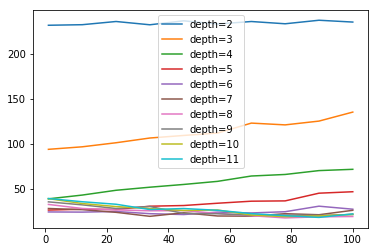

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

for i in range(scores.shape[0]):
    plt.plot(np.linspace(1, 100, 10), scores[i], label='depth=' + str(np.arange(2, 12)[i]))
plt.legend()

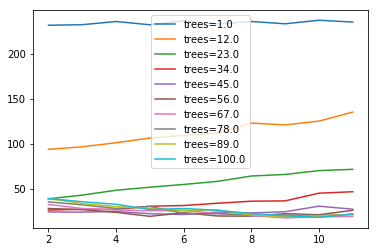

In [ ]:
for i in range(scores.shape[1]):
    plt.plot(np.arange(2, 12), scores[i], label='trees=' + str(np.linspace(1, 100, 10)[i]))
plt.legend()

Сравним со случайным лесом

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor

linear_preds = RandomForestRegressor().fit(X_train, y_train).predict(X_test)
res5 = mean_squared_error(y_test, linear_preds) ** 0.5
print(res5)

4.808475211360427
Wall time: 1.37 s
